In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [57]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #set x as an array of zeroes
    x = np.zeros(np.shape(t))

    x[0] = x0
    delta_t = t[1] - t[0]
    
    for i in range(1, len(t)):
        t_i = t[i - 1]
        x[i] = x[i-1] + delta_t*f(x[i - 1], t_i)
    return x


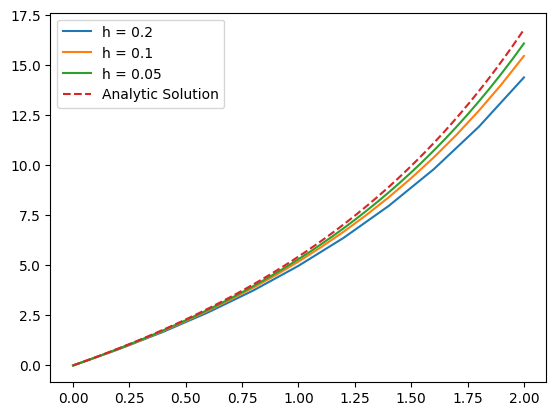

In [58]:
# set analytical and initial solutions
analytical = lambda x: -2 + 2*x + 2*np.exp(x)
f = lambda x, t: x - 2*t + 4
x0 = 0

for h in [0.2, 0.1, 0.05]:
    t = np.arange(0, 2 + h, h)
    plt.plot(t, euler(f, x0, t), label = f"h = {h}")
x = np.linspace(0, 2, 1000)
plt.plot(x, analytical(x), "--", label = "Analytic Solution")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [59]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # set initial conditions
    x = np.zeros(np.shape(t))
    x[0] = x0
    delta_t = t[1] - t[0]

    for i in range(1, len(t)):
        t_i = t[i - 1]
        x_val = x[i - 1] + delta_t/2*f(x[i-1], t_i)
        x[i] = x[i-1] + delta_t*f(x_val, t_i + delta_t/2)
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #choose delta t 
    delta_t = t[1] - t[0]

    #in case of multidimensions
    if np.isscalar(x0):
        x0 = np.array([x0])
    xs = np.zeros((len(t), len(x0)))
    xs[0] = x0
    
    for i in range(1, len(t)):
        t_i = t[i - 1]
        k_0 = f(xs[i - 1], t_i)
        k_1 = f(xs[i - 1] + (delta_t / 2) * k_0, t_i + delta_t/2)
        k_2 = f(xs[i -1] + (delta_t / 2) * k_1, t_i + delta_t/2)
        k_3 = f(xs[i -1] + delta_t * k_2, t_i + delta_t)
        xs[i] = xs[i -1] + (delta_t / 6) * (k_0 + 2 * k_1 + 2 * k_2 + k_3)
    return xs

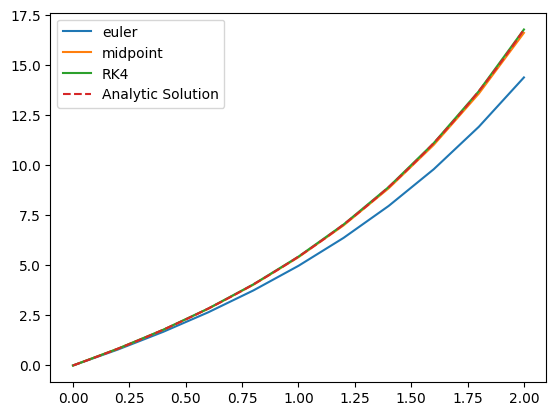

In [56]:
#set analytical solution
analytical = lambda x: -2 + 2*x + 2*np.exp(x)
f = lambda x, t: x - 2*t + 4
x0 = 0
h = .2
t = np.arange(0, 2 + h, h)

#plot different methods
plt.plot(t, euler(f, x0, t), label = "euler")
plt.plot(t, midpoint(f, x0, t), label = f"midpoint")
plt.plot(t, rk4(f, x0, t), label="RK4")

x = np.linspace(0, 2, 1000)
plt.plot(x, analytical(x), "--", label = "Analytic Solution")
plt.legend()
plt.show()

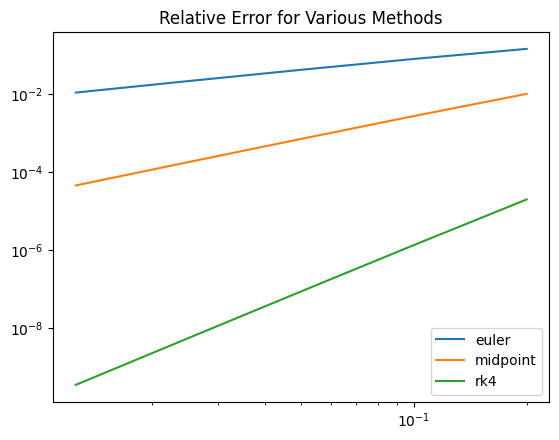

In [55]:

# get f(2) for error
hs = [0.2, 0.1, 0.05, 0.025, 0.0125]
x2 = np.abs(analytical(2))

#plot error on log log
for method in [euler, midpoint, rk4]:
    rel_errors = []
    for h in hs:
        ts = np.arange(0, 2 + h, h)
        xs = method(f, x0, ts)
        rel_errors.append(np.abs(x2 - xs[-1]) / x2)
    plt.loglog(hs, rel_errors, label=method.__name__)

plt.legend()
plt.title("Relative Error for Various Methods")
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

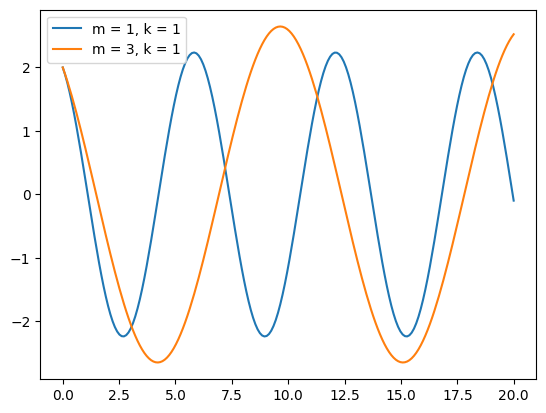

In [52]:
#set initial values
x = np.zeros((len(t), 2))
x[0] = [2, -1]

#loop through m and k
for m, k in [(1, 1), (3, 1)]:
    t = np.linspace(0, 20, 200)
    f = lambda x, t: np.array([x[1], (-k/m)*x[0]])
    xs = rk4(f, x[0], t)
    plt.plot(t, xs[:, 0], label=f"m = {m}, k = {k}")
plt.legend()
plt.show()


## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

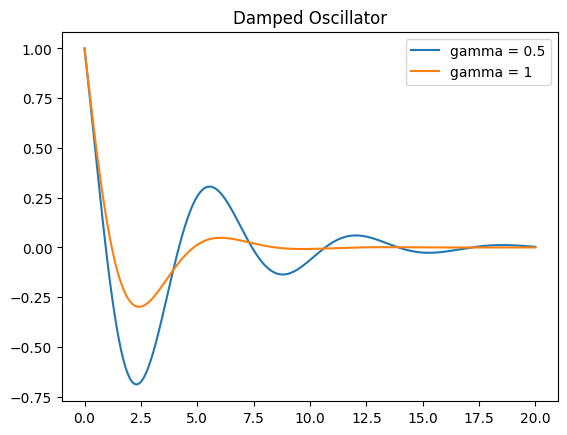

In [51]:
#set initial values
x = np.zeros((len(t), 2))
x[0] = [1, -1]

#go through values gamma
for gamma in [1/2, 1]:
    t = np.linspace(0, 20, 200)
    f = lambda x, t: np.array([x[1], -gamma*x[1] - x[0]])
    xs = rk4(f, x[0], t)
    plt.plot(t, xs[:, 0], label=f"gamma = {gamma}")
    
plt.legend()
plt.title("Damped Oscillator")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

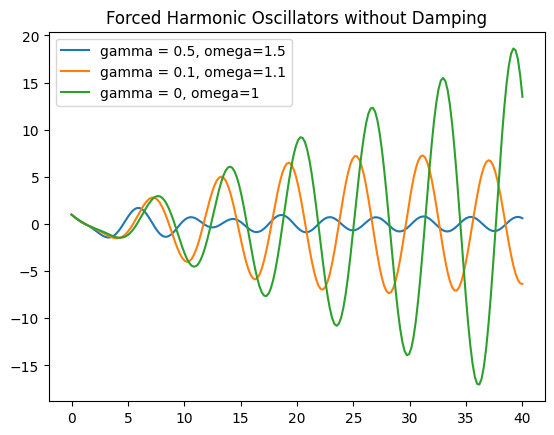

In [49]:
#set initial value of x
x0 = [2, -1]

#go through different values of gamma and omega
for gamma, omega in [(0.5, 1.5), (0.1, 1.1), (0, 1)]:
    t = np.linspace(0, 40, 200)
    f = lambda x, t: np.array([x[1], (2*np.cos(omega*t) - 2*x[0] - gamma*x[1])/2])
    xs = rk4(f, x[0], t)
    plt.plot(t, xs[:, 0], label=f"gamma = {gamma}, omega={omega}")
    
plt.legend()
plt.title("Forced Harmonic Oscillators without Damping")
plt.show()